In [26]:
#ref : http://machine-learning-python.kspax.io/Feature_Selection/ex6_univariate_feature_selection.html
#ref : http://scikit-learn.org/stable/modules/feature_selection.html
#ref : http://scikit-learn.org/stable/supervised_learning.html
#ref : http://scikit-learn.org/stable/auto_examples/neighbors/plot_nearest_centroid.html#example-neighbors-plot-nearest-centroid-py
#ref : http://scikit-learn.org/stable/tutorial/statistical_inference/index.html#stat-learn-tut-index
#ref : http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html

In [57]:
#import modules 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd, numpy as np 
%matplotlib inline
%pylab inline
import seaborn  as sns 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import datasets, svm
from sklearn.linear_model import SGDClassifier
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid
import pylab as pl
from sklearn import neighbors
from sklearn.learning_curve import learning_curve
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits



Populating the interactive namespace from numpy and matplotlib


# Index
# 1. Data overview
# 2. Feature selection
# 3. Classifier
# 4. Learning Curve

# select data 

In [28]:

iris = datasets.load_iris()

X = iris.data
Y = iris.target

In [29]:
shape(X)

(150, 4)

# 1. Data overview

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d7e73c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d8ec898>]], dtype=object)

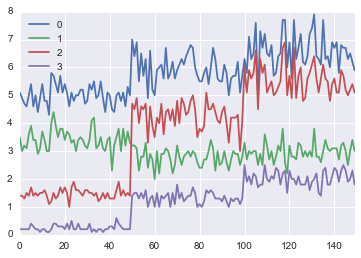

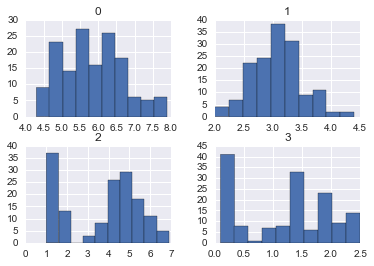

In [30]:
# line & histogram plot 
pd.DataFrame(X).plot()
pd.DataFrame(X).hist()

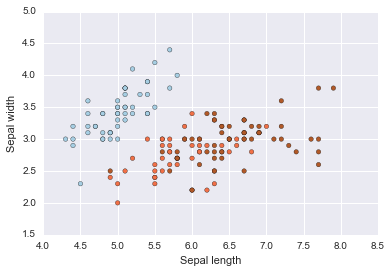

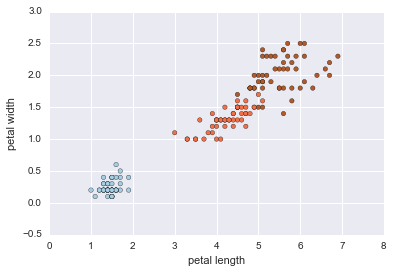

In [31]:
# scatter plot 

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

plt.scatter(X[:, 2], X[:, 3], c=Y, cmap=plt.cm.Paired)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()


# 2. FEATURE SELECTION 

##  2.1 ExtraTreesClassifier

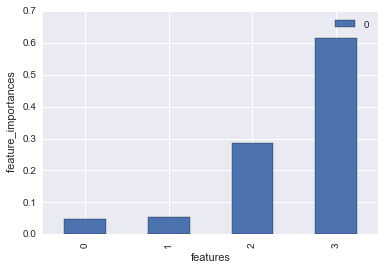

In [32]:
# ExtraTreesClassifier
iris = load_iris()
X, y = iris.data, iris.target
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_ 
pd.DataFrame(clf.feature_importances_).plot(kind='bar') 
pyplot.xlabel('features')
pyplot.ylabel(' feature_importances')

## 2.2  ADD NOISES 

<Container object of 24 artists>

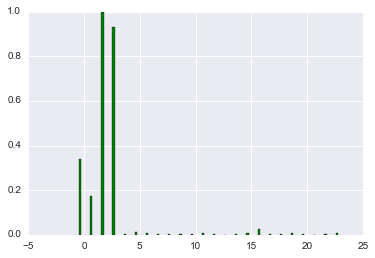

In [33]:
# add noises to data 
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))
X = np.hstack((iris.data, E))
y = iris.target
selector = SelectPercentile(f_classif, percentile=10)
X_indices = np.arange(X.shape[-1])
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')

## 2.3 Compare weights via SVM

<Container object of 24 artists>

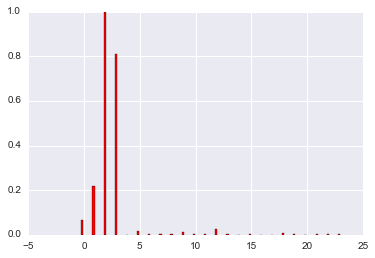

In [34]:
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()
plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')


# 3. Classifier

## 3.1  SVM Classifier  

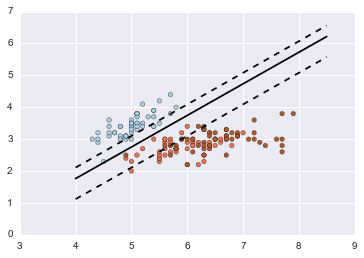

In [35]:

X = iris.data[:,:2]
Y = iris.target



clf = svm.SVC(kernel='linear')
clf.fit(X, Y)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4, 8.5)
yy = a * xx - (clf.intercept_[0]) / w[1]


b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)



## 3.2  SGD Classifier 

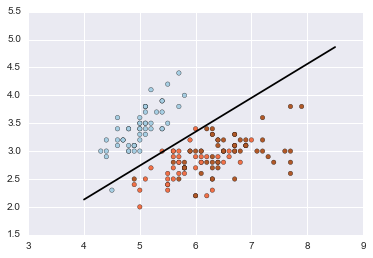

In [36]:
iris = datasets.load_iris()

X = iris.data[:,:2]
Y = iris.target


clf = SGDClassifier()

clf.fit(X, Y)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4, 8.5)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

In [ ]:
# 3.3  Nearest Centroid Classification 

None 0.813333333333
0.1 0.813333333333


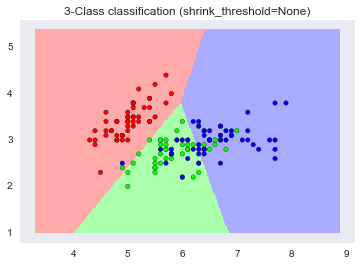

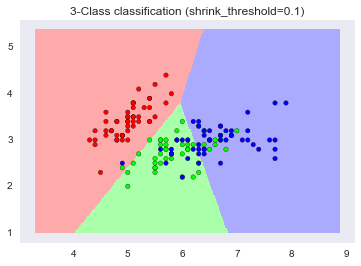

In [37]:
n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for shrinkage in [None, 0.1]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.title("3-Class classification (shrink_threshold=%r)"
              % shrinkage)
    plt.axis('tight')

plt.show()

# 3.4 LogisticRegression Classification

Automatically created module for IPython interactive environment


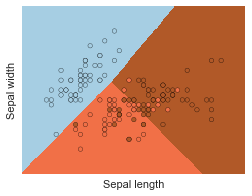

In [38]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# 3.5 k-nearest neighbors classification 

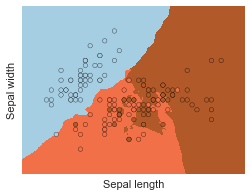

In [39]:

# Code source: Gael Varoqueux
# Modified for Documentation merge by Jaques Grobler
# License: BSD

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. 
Y = iris.target


h = .02 # step size in the mesh

knn=neighbors.KNeighborsClassifier()

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(X[:,0], X[:,1],c=Y )
pl.xlabel('Sepal length')
pl.ylabel('Sepal width')

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()

# 4. Learning Curve

# 4.1  Learning Curve - Forest

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


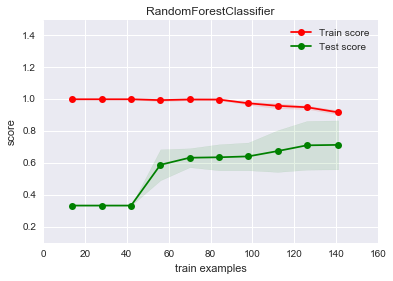

In [54]:
iris = datasets.load_iris()

X = iris.data[:,:2]
Y = iris.target

forest = RF()


train_sizes, train_scores, test_scores = learning_curve(forest, X, y, cv=20,train_sizes=np.linspace(.1, 1., 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("RandomForestClassifier")
plt.legend(loc="best")
plt.xlabel("Train examples")
plt.ylabel("Score")
plt.ylim((0.1, 1.5))
#plt.gca().invert_yaxis()



plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Train score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")


plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")
plt.xlabel('train examples')
plt.ylabel('score')
plt.title("RandomForestClassifier")
plt.legend(loc="best")

# 4.2  Learning Curve - naive_bayes

/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


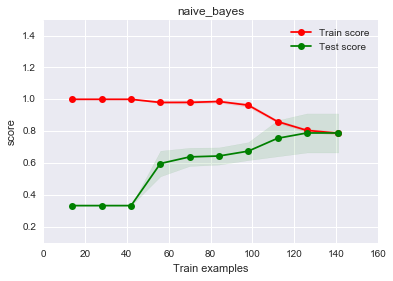

In [60]:
iris = datasets.load_iris()

X = iris.data[:,:2]
Y = iris.target

train_sizes, train_scores, test_scores = learning_curve(GaussianNB(), X, y, cv=20,train_sizes=np.linspace(.1, 1., 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("naive_bayes")
plt.legend(loc="best")
plt.xlabel("Train examples")
plt.ylabel("Score")
plt.ylim((0.1, 1.5))



plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Train score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")

# Plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")
plt.xlabel('Train examples')
plt.ylabel('score')
plt.title("naive_bayes")
plt.legend(loc="best")